<hr>

# Sentiment Analysis on IMDb reviews
<hr>

In [1]:
import pandas as pd
import numpy as np

<hr>

### Importing Dataset

Dataset has to be imported with encoding ISO-8859-1,<br>
because the text under the review column does not support UTF encoding
<hr>

In [2]:
df=pd.read_csv('imdb_master.csv',encoding='ISO-8859-1',index_col=0)


In [3]:
df.head()

,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
type      100000 non-null object
review    100000 non-null object
label     100000 non-null object
file      100000 non-null object
dtypes: object(4)
memory usage: 3.8+ MB


In [5]:
df.type.value_counts()

train    75000
test     25000
Name: type, dtype: int64

In [6]:
df.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

<hr>
We don't require columns type and file<br>
therefore,they can be dropped
<hr>

In [7]:
df.drop(['type','file'],axis=1,inplace=True)

In [8]:
df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [9]:
print(df[df.label=='unsup'].iloc[1][0])

Take a low budget, inexperienced actors doubling as production staffÂ? as well as limited facilitiesÂ?and you can't expect much more than "Time Chasers" gives you, but you can absolutely expect a lot less. This film represents a bunch of good natured friends and neighbors coming together to collaborate on an interesting project. If your cousin had been one of those involved, you would probably think to yourself, "ok, this movie is terrible... but a really good effort." For all the poorly delivered dialog and ham-fisted editing, "Time Chasers" has great scope and ambition... and one can imagine it was necessary to shoot every scene in only one or two takes. So, I'm suggesting people cut "Time Chasers" some slack before they cut in the jugular. That said, I'm not sure I can ever forgive the pseudo-old lady from the grocery store for the worst delivery every wrenched from the jaws of a problematic script.


<hr>
This classification problem only deals with classification of reviews as positive or negetive.<br>
We don't need values with label 'unsup'
<hr>

In [10]:
df=df[df.label!='unsup']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review    50000 non-null object
label     50000 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [11]:
df.index=[i for i in range(50000)]  #Redefining index for the DataFrame

<hr>

### Lemmatization and Simplification of Review
Lemmatization and removal of words that are not helpful can help us by reducing the number of dimentions of the vector.<br>

<hr>

In [12]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
wordnet_tags=['n','v']
lem=WordNetLemmatizer()

def word_features(doc):
    tagged=pos_tag(word_tokenize(doc))
    
    doc_=[]
    for token,tag in tagged:
        if tag=='NNPS' or tag=='NNP' or tag=='POS' or tag==token: # removal of proper nouns,punctuation marks and apostrophe
            pass
        elif tag[0].lower() in wordnet_tags:   #checking if token is verb or noun for lemmatization
            doc_.append(lem.lemmatize(token.lower(),tag[0].lower()))
        else :
            doc_.append(token.lower())
    doc_x=' '.join(doc_).strip() 
    return doc_x
    

In [14]:
word_features(df.review[0])

"once again have drag out a movie for far longer than necessary aside from the terrific sea rescue sequence of which there be very few i just do not care about any of the character most of us have ghost in the closet and character be realize early on and then forget until much later by which time i do not care the character we should really care about be a very cocky overconfident the problem be he come off as kid who think he 's better than anyone else around him and show no sign of a cluttered closet his only obstacle appear to be win over finally when we be well past the half way point of this stinker tell us all about ghost we be tell why be drive to be the best with no prior inkling or foreshadowing no magic here it be all i could do to keep from turn it off an hour in"

In [15]:
df.review=df.review.apply(word_features) # applying lemmatize function for the column review

In [16]:
df.head()

,review,label
0,once again have drag out a movie for far longe...,neg
1,this be an example of why the majority of acti...,neg
2,of all i hate those moronic rapper who could'n...,neg
3,not even the could write song everyone like an...,neg
4,picture movie be not a fitting word for them r...,neg


In [17]:
df.label=df.label.map({'neg':0,'pos':1})

In [18]:
df.head()

,review,label
0,once again have drag out a movie for far longe...,0
1,this be an example of why the majority of acti...,0
2,of all i hate those moronic rapper who could'n...,0
3,not even the could write song everyone like an...,0
4,picture movie be not a fitting word for them r...,0


<hr>

### Vectorization
The text data has to be converted to a Vector form where each column will represent a word.<br>
Vector will be a sparse matrix to save memory
<hr>

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words='english')
X=vec.fit_transform(df.review)
y=df.label

In [20]:
X  

<50000x59541 sparse matrix of type '<class 'numpy.int64'>'
	with 3626442 stored elements in Compressed Sparse Row format>

In [21]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

<hr>

### Train Test Spliting
<hr>

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<hr>

### Training the Classifier
<hr>


In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='newton-cg')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y__=clf.predict(X_test)

<hr>

### Metrics
<hr>

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y__))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7557
           1       0.87      0.88      0.87      7443

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [26]:
accuracy_score(y_test,y__)

0.8725333333333334

In [35]:
conn=confusion_matrix(y_test,y__)
conn

array([[6541, 1016],
       [ 896, 6547]], dtype=int64)

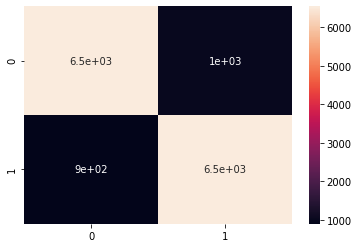

In [36]:
import seaborn as sns
sns.heatmap(conn,annot=True)


In [28]:
from joblib import dump
dump(vec,'vectorizer.joblib')
dump(clf,'classifier.joblib')

['classifier.joblib']